# CSAPR and CHIVO grid, plot CAPPIs#

Ivan Arias

2020/05/28

In [2]:
import pyart

def plot_grid(grid, field, title, vmax, vmin, level, cmap):
    display = pyart.graph.GridMapDisplay(grid)
    fig = plt.figure(figsize=[8, 8])
    display.plot_basemap(lon_lines = np.arange(-100, 0, 0.1))
    display.plot_basemap(lat_lines = np.arange(-100, 0, 0.1)) 
    display.plot_grid(field, level=level,  
                      vmin= vmin, vmax= vmax, title = title,
                      cmap = cmap)
    display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
    display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])
    return fig

# Stratiform Case 2018/11/30
    #For paper
filename_chivo = '/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/DROPS/drops_paper/chivo.1b.20181130_033054.REL_PNL360A_disdrometer.nc'
filename_csapr = '/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/DROPS/drops_paper/corcsapr2cfrppiqcM1.b1.20181130.033003_disdrometer.nc'

# filename_chivo = '/net/denali/storage2/radar2/tmp/Ivan/Field_Campaigns/Relampago/Analisis/DualRadar/20181130/DROPS/cfrad.20181130_033054.697_to_20181130_033709.927_col-radar_REL_PNL360A_SUR.nc'
# filename_csapr = '/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/20181130/DROPS/corcsapr2cfrppiM1.a1.20181130.033003.nc'

# filename_chivo = '/net/denali/storage/radar/RELAMPAGO/quality_controlled_data/level_1b/2018/11/30/chivo.1b.20181130_033054.REL_PNL360A.nc'
# filename_csapr = '/net/denali/storage/radar/CSAPR/DROPS/corcsapr2cfrppiqcM1.b1.20181130.033003.nc'

# Convective Case 2018/12/14
# filename_chivo = '/net/denali/storage2/radar2/tmp/Ivan/Field_Campaigns/Relampago/Analisis/DualRadar/Data/DROPS/cfrad.20181214_020041.798_to_20181214_020556.800_col-radar_REL_PFAR360_SUR.nc'
# filename_csapr = '/net/denali/storage2/radar2/tmp/Ivan/DOE/RELAMPAGO/20181214/data/DROPS/corcsapr2cfrppiM1.a1.20181214.020004.nc'

CHIVO = pyart.io.read(filename_chivo)
CSAPR =  pyart.io.read(filename_csapr)

# Azimuth Correction
#CHIVO.azimuth['data'] = CHIVO.azimuth['data'] - 3.06 # Azimuth offset for 20181130
# CHIVO.azimuth['data'] = CHIVO.azimuth['data'] - 7.5 # Azimuth offset for 20181214

# Filter data
gatefilter_CHIVO = pyart.filters.GateFilter(CHIVO)
gatefilter_CHIVO.exclude_transition()
gatefilter_CHIVO.exclude_outside('corrected_reflectivity', 20, 100)
gatefilter_CHIVO.exclude_outside('corrected_copol_correlation_ratio', 0.9, 1)
#gatefilter_CHIVO.exclude_outside('corrected_differential_reflectivity', -2, 6)
gatefilter_CHIVO.exclude_invalid('corrected_differential_phase')

gatefilter_CSAPR = pyart.filters.GateFilter(CSAPR)
gatefilter_CSAPR.exclude_transition()
gatefilter_CSAPR.exclude_outside('corrected_reflectivity', 20, 100)
gatefilter_CSAPR.exclude_outside('corrected_copol_correlation_ratio', 0.9, 1)

#Grid origin
lat_mid = (CHIVO.latitude['data'][0] + CSAPR.latitude['data'][0])/2
lon_mid = (CHIVO.longitude['data'][0] + CSAPR.longitude['data'][0])/2
alt_mid = (CHIVO.altitude['data'][0] + CSAPR.altitude['data'][0])/2

#Creating the grids, resolution 100m
CSAPR_grid = pyart.map.grid_from_radars(
        (CSAPR,), gatefilters=(gatefilter_CSAPR,), 
        grid_shape=(7, 51, 51), grid_limits=((1200, 2400.0),(-5000, 5000), (-5000, 5000)), # for comparison
        #grid_shape=(21, 351, 351), grid_limits=((1200, 11200.0),(-35000, 35000), (-35000, 35000)), # for plot
        fields=['corrected_reflectivity', 'corrected_differential_reflectivity', 'corrected_copol_correlation_ratio', 'corrected_specific_differential_phase'], 
        gridding_algo= 'map_gates_to_grid', # 'map_to_grid', # 
        grid_origin = (lat_mid, lon_mid), grid_origin_alt = alt_mid,
        weighting_function='BARNES')

CHIVO_grid = pyart.map.grid_from_radars(
        (CHIVO,), gatefilters=(gatefilter_CHIVO,), 
        grid_shape=(7, 51, 51), grid_limits=((1200, 2400.0),(-5000, 5000), (-5000, 5000)), # for comparison
        #grid_shape=(21, 351, 351), grid_limits=((1200, 11200.0),(-35000, 35000), (-35000, 35000)), # for plot
        fields=['corrected_reflectivity', 'corrected_differential_reflectivity', 'corrected_copol_correlation_ratio', 'corrected_specific_differential_phase'],
        gridding_algo= 'map_gates_to_grid', # 'map_to_grid', # 
        grid_origin = (lat_mid, lon_mid), grid_origin_alt = alt_mid,
        weighting_function='BARNES')

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


In [3]:
# Export grids
    # Paper
csapr_gridFilename = '/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/DROPS/grid_paper/csapr_grid_20181130-0330_disdrometer.nc'
chivo_gridFilename = '/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/DROPS/grid_paper/chivo_grid_20181130-0330_disdrometer.nc'


# csapr_gridFilename = '/net/denali/storage2/radar2/tmp/Ivan/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/csapr_grid_20181130-0330_1b.nc'
# chivo_gridFilename = '/net/denali/storage2/radar2/tmp/Ivan/Field_Campaigns/Relampago/Analisis/CHIVO_CSAPR/data/chivo_grid_20181130-0330_1b.nc'

pyart.io.write_grid(csapr_gridFilename, CSAPR_grid, format='NETCDF4') 
                   #write_proj_coord_sys=True)

pyart.io.write_grid(chivo_gridFilename, CHIVO_grid, format='NETCDF4') 
                   #write_proj_coord_sys=True)

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


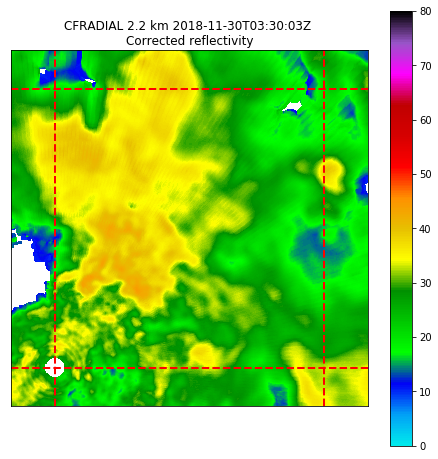

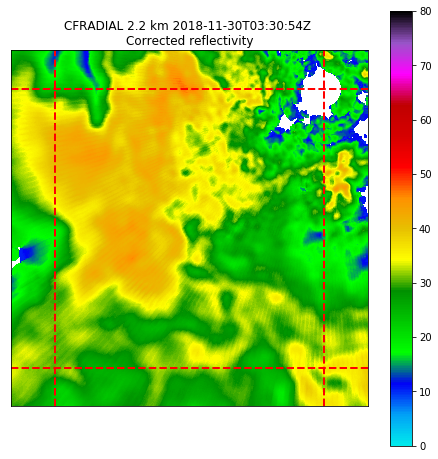

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#%%Display Grid
display = pyart.graph.GridMapDisplay(CSAPR_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Color Map
#Ref: pyart.graph.cm.NWSRef
#Diff_Ref: pyart.graph.cm.RefDiff

# parameters
level = 2
display.plot_grid('corrected_reflectivity', level=level,  
                  vmin= 0, vmax= 80, cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

#CHIVO CAPPI
display = pyart.graph.GridMapDisplay(CHIVO_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

display.plot_grid('corrected_reflectivity', level=level,  
                  vmin= 0, vmax= 80, cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


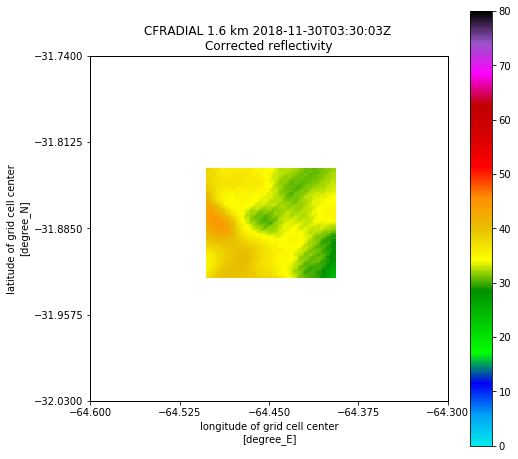

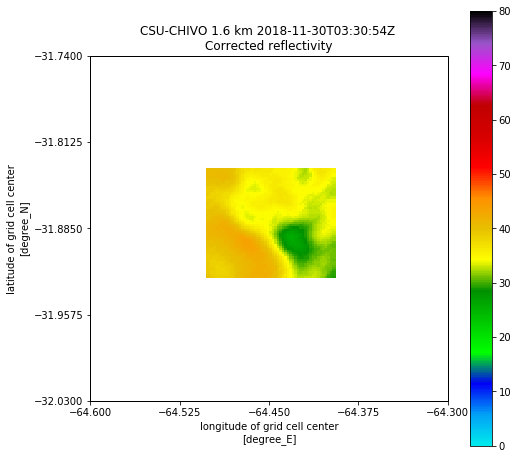

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#%%Display Grid
display = pyart.graph.GridMapDisplay(CSAPR_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Color Map
#Ref: pyart.graph.cm.NWSRef
#Diff_Ref: pyart.graph.cm.RefDiff

# parameters
level = 2
display.plot_grid('corrected_reflectivity', level=level,  
                  vmin= 0, vmax= 80, cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

#CHIVO CAPPI
display = pyart.graph.GridMapDisplay(CHIVO_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

display.plot_grid('corrected_reflectivity', level=level,  
                  vmin= 0, vmax= 80, cmap = pyart.graph.cm.NWSRef)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


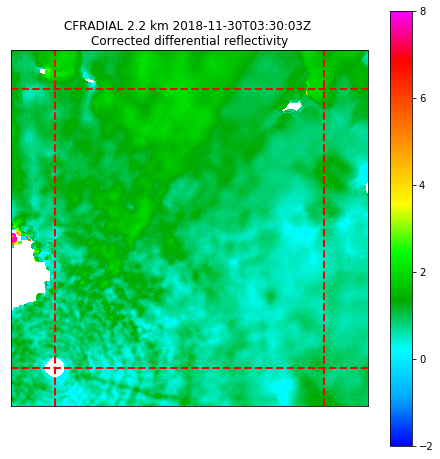

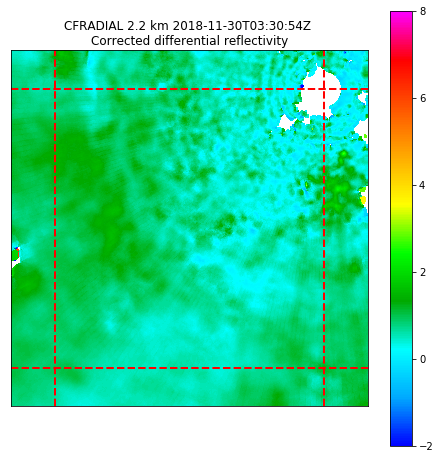

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#%%Display Grid
display = pyart.graph.GridMapDisplay(CSAPR_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Color Map
#Ref: pyart.graph.cm.NWSRef
#Diff_Ref: pyart.graph.cm.RefDiff

# parameters
level = 2
display.plot_grid('corrected_differential_reflectivity', level=level,  
                  vmin= -2, vmax= 8, cmap = pyart.graph.cm.RefDiff)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

#CHIVO CAPPI
display = pyart.graph.GridMapDisplay(CHIVO_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

display.plot_grid('corrected_differential_reflectivity', level=level,  
                  vmin= -2, vmax= 8, cmap = pyart.graph.cm.RefDiff)
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


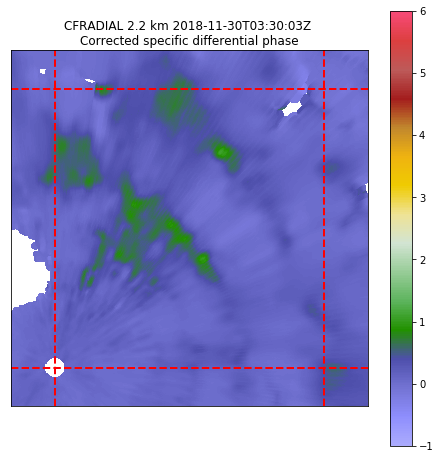

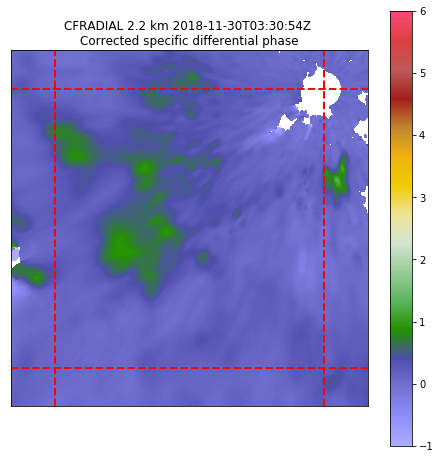

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#%%Display Grid
display = pyart.graph.GridMapDisplay(CSAPR_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Color Map
#Ref: pyart.graph.cm.NWSRef
#Diff_Ref: pyart.graph.cm.RefDiff
#Kdp = 'viridis'

# parameters
level = 2
display.plot_grid('corrected_specific_differential_phase', level=level,  
                  vmin= -1, vmax= 6)#, cmap = 'viridis')
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

#CHIVO CAPPI
display = pyart.graph.GridMapDisplay(CHIVO_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

display.plot_grid('corrected_specific_differential_phase', level=level,  
                  vmin= -1, vmax= 6)#, cmap = 'viridis')
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4759: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


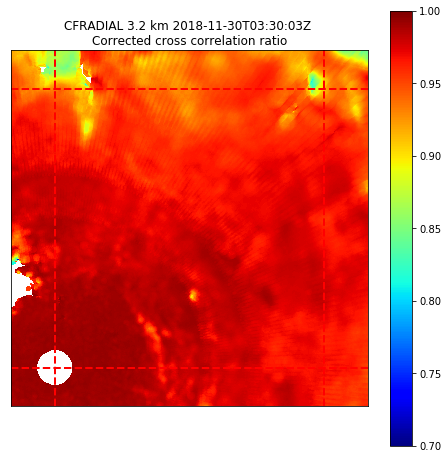

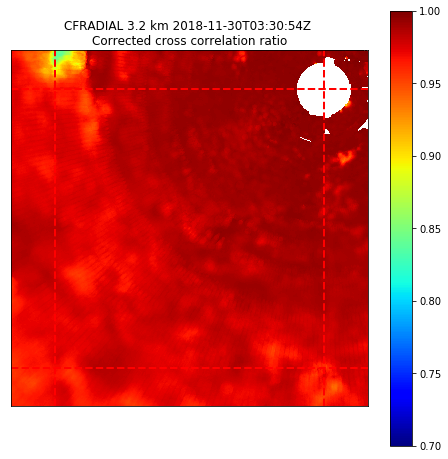

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#%%Display Grid
display = pyart.graph.GridMapDisplay(CSAPR_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Color Map
#Ref: pyart.graph.cm.NWSRef
#Diff_Ref: pyart.graph.cm.RefDiff
#Kdp = 'viridis'

# parameters
level = 4
display.plot_grid('corrected_copol_correlation_ratio', level=level,  
                  vmin= 0.7, vmax= 1, cmap = 'jet')
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])

#CHIVO CAPPI
display = pyart.graph.GridMapDisplay(CHIVO_grid)
fig = plt.figure(figsize=[8, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

display.plot_grid('corrected_copol_correlation_ratio', level=level,  
                  vmin= 0.7, vmax= 1, cmap = 'jet')
display.plot_crosshairs(CSAPR.longitude['data'][0],CSAPR.latitude['data'][0])
display.plot_crosshairs(CHIVO.longitude['data'][0],CHIVO.latitude['data'][0])